In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df1=pd.read_csv('Downloads/nba_2013.csv')

In [4]:
df1

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [123]:
df1['season'].unique()

array(['2013-2014'], dtype=object)

In [138]:
df1['season_end'].unique()

array([2013], dtype=int64)

In [6]:
df1.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
tmp=df1.dropna()

In [8]:
tmp.shape

(403, 31)

In [11]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        403 non-null    object 
 1   pos           403 non-null    object 
 2   age           403 non-null    int64  
 3   bref_team_id  403 non-null    object 
 4   g             403 non-null    int64  
 5   gs            403 non-null    int64  
 6   mp            403 non-null    int64  
 7   fg            403 non-null    int64  
 8   fga           403 non-null    int64  
 9   fg.           403 non-null    float64
 10  x3p           403 non-null    int64  
 11  x3pa          403 non-null    int64  
 12  x3p.          403 non-null    float64
 13  x2p           403 non-null    int64  
 14  x2pa          403 non-null    int64  
 15  x2p.          403 non-null    float64
 16  efg.          403 non-null    float64
 17  ft            403 non-null    int64  
 18  fta           403 non-null    

In [13]:
len(tmp['pos'].unique())

6

In [14]:
len(tmp['bref_team_id'].unique())

31

In [15]:
len(tmp['season'].unique())

1

In [57]:
tmp1=tmp.drop(['player','pos','season'],1)

In [58]:
L=LabelEncoder()
tmp1['bref_team_id']=L.fit_transform(tmp1['bref_team_id'])

In [59]:
tmp1.shape

(403, 28)

In [60]:
model=LinearRegression()
model.fit(tmp1.drop('pts',1),tmp1['pts'])

LinearRegression()

In [61]:
model.score(tmp1.drop('pts',1),tmp1['pts'])

1.0

In [62]:
importance=model.coef_
importance

array([ 1.14350788e-14,  1.02738703e-14,  5.87608961e-15, -9.72684910e-16,
       -1.07565487e-15,  1.66666667e+00,  2.90968251e-15, -2.52509101e-13,
        1.33333333e+00, -3.29686872e-16, -9.53808133e-15,  3.33333333e-01,
        2.64200552e-15,  2.70811233e-13, -2.92055020e-14,  1.00000000e+00,
       -1.03869111e-15, -3.29780649e-15,  3.88389186e-17, -2.33086319e-15,
       -1.32969878e-15, -8.31728563e-17, -2.98328191e-16,  1.00876409e-15,
       -5.00604053e-16, -3.11213211e-16,  0.00000000e+00])

In [63]:
importance=model.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 1.66667
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 1.33333
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.33333
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: 1.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000


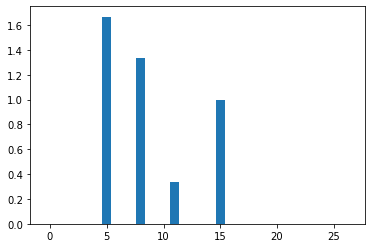

In [64]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Here we can clearly see there are only 4 main variables for prediction that is 4,7,10,14

In [41]:
tmp1.columns[4],tmp1.columns[7],tmp1.columns[10],tmp1.columns[14]

('fg', 'x3p', 'x2p', 'ft')

In [42]:
df1.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [88]:
# lets take the data for prediction
data=df1[['pos','fg','x3p','x2p','ft','pts']]

In [89]:
data

,pos,fg,x3p,x2p,ft,pts
0,SF,66,4,62,35,171
1,C,93,0,93,79,265
2,PF,143,0,143,76,362
3,SG,464,128,336,274,1330
4,C,136,0,136,56,328
...,...,...,...,...,...,...
476,SG,345,40,305,209,939
477,SG,387,135,252,235,1144
478,PF,582,90,492,163,1417
479,C,172,0,172,146,490


In [90]:
data.isnull().sum()

pos    0
fg     0
x3p    0
x2p    0
ft     0
pts    0
dtype: int64

In [91]:
# As position can be ordinal data as points can be effected to the position players play so we labelencode it
data['pos']=L.fit_transform(data['pos'])

<ipython-input-91-8f903f0638ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pos']=L.fit_transform(data['pos'])


In [92]:
data

,pos,fg,x3p,x2p,ft,pts
0,5,66,4,62,35,171
1,0,93,0,93,79,265
2,3,143,0,143,76,362
3,6,464,128,336,274,1330
4,0,136,0,136,56,328
...,...,...,...,...,...,...
476,6,345,40,305,209,939
477,6,387,135,252,235,1144
478,3,582,90,492,163,1417
479,0,172,0,172,146,490


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017113D59D60>,
      dtype=object)

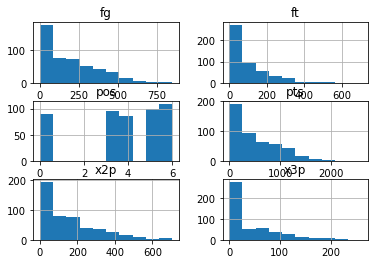

In [93]:
data.hist()

Here we can see mostly data is positive skewed.

In [108]:
data.shape

(481, 6)

In [112]:
# Now lets's scale our data using MinMaxScaler
S=MinMaxScaler()
data[data.columns[:5]]=S.fit_transform(data[data.columns[:5]])
data

<ipython-input-112-0b020af27f46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[:5]]=S.fit_transform(data[data.columns[:5]])
C:\Mba notes\novels\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,pos,fg,x3p,x2p,ft,pts
0,0.833333,0.077739,0.015326,0.087819,0.049787,171
1,0.000000,0.109541,0.000000,0.131728,0.112376,265
2,0.500000,0.168433,0.000000,0.202550,0.108108,362
3,1.000000,0.546525,0.490421,0.475921,0.389758,1330
4,0.000000,0.160188,0.000000,0.192635,0.079659,328
...,...,...,...,...,...,...
476,1.000000,0.406360,0.153257,0.432011,0.297297,939
477,1.000000,0.455830,0.517241,0.356941,0.334282,1144
478,0.500000,0.685512,0.344828,0.696884,0.231863,1417
479,0.000000,0.202591,0.000000,0.243626,0.207681,490


In [113]:
# Now let's split our data for training and testing 
x_train,x_test,y_train,y_test=train_test_split(data.drop('pts',1),data['pts'],test_size=0.8,random_state=56)

In [119]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

 So Here we can see model is giving 100% accuracy even for testing dataset

In [121]:
# Now let's make our final model by using all dataset for training
final_model=LinearRegression()
final_model.fit(data.drop('pts',1),data['pts'])
final_model.score(data.drop('pts',1),data['pts'])

1.0

In [124]:
predictions=final_model.predict(data.drop('pts',1))

In [137]:
final_data=pd.DataFrame([df1['player'],predictions]).T
final_data=final_data.rename(columns={'Unnamed 0':'Predictions'})
final_data

,player,Predictions
0,Quincy Acy,171
1,Steven Adams,265
2,Jeff Adrien,362
3,Arron Afflalo,1330
4,Alexis Ajinca,328
...,...,...
476,Tony Wroten,939
477,Nick Young,1144
478,Thaddeus Young,1417
479,Cody Zeller,490


Above are the predictions of points scored by Players

In [141]:
# Total points scored by NBA players 
print("Total points scored :" ,sum(final_data['Predictions']))

Total points scored : 248476.0
